<a href="https://colab.research.google.com/github/thangtb172/facerecognition/blob/main/Run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [300]:
# %cd /content/drive/My Drive/Face_final/face-aivi/mysrc
# !ls

In [301]:
 # !pip install mxnet-cu101

In [302]:
"""
import sys
sys.path.append('../models/insightface/deploy') 
import face_model
import argparse
import cv2
import sys
import numpy as np
import os
from tqdm import *
import imgaug as ia
from imgaug import augmenters as iaa
"""


"\nimport sys\nsys.path.append('../models/insightface/deploy') \nimport face_model\nimport argparse\nimport cv2\nimport sys\nimport numpy as np\nimport os\nfrom tqdm import *\nimport imgaug as ia\nfrom imgaug import augmenters as iaa\n"

In [303]:
# generate_insightface
# !python n_generate_insightface_embedding.py --image-size 112,112 --model ../models/insightface/models/model-r100-ii/model,0 --gpu 0

In [304]:
%cd /content/drive/My Drive/Face_final/face-aivi/mysrc/model1_insightface
!ls

/content/drive/My Drive/Face_final/face-aivi/mysrc/model1_insightface
clr_callback.py  test_final.csv      train_final.csv	    weights
prepare.py	 test_flip_data.npy  training_log_test.txt
__pycache__	 train_aug_data.npy  training_log.txt
test_data.npy	 train_data.npy      train.py


In [305]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import numpy as np
import keras
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from tensorflow.keras import *
from tensorflow.keras.models import *
from tensorflow.keras.layers import Input, concatenate, Conv2D, Activation, BatchNormalization, Dense, Dropout, Flatten, add, Lambda
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.utils import multi_gpu_model
from tensorflow.keras.utils import to_categorical
from sklearn.utils import shuffle
from clr_callback import CyclicLR
from tensorflow_addons.optimizers import CyclicalLearningRate
import random
import threading
from random import randint
import os
from tensorflow.keras import initializers
from google.colab.patches import cv2_imshow
import cv2


x_train = np.load('train_data.npy')
x_test = np.load('test_data.npy')
train_df = pd.read_csv('train_final.csv')
test_df = pd.read_csv('test_final.csv')
print(len(x_train))
print(train_df.shape)
print(len(x_test))
print(test_df.shape)

9074
(9074, 2)
2278
(2278, 2)


In [306]:
train_df

,id,labels
0,singerdongnhi_484.jpg,singerdongnhi
1,singerdongnhi_384.jpg,singerdongnhi
2,singerdongnhi_538.jpg,singerdongnhi
3,singerdongnhi_260.jpg,singerdongnhi
4,singerdongnhi_420.jpg,singerdongnhi
...,...,...
9069,puka_nguyen_715.jpg,puka_nguyen
9070,puka_nguyen_442.jpg,puka_nguyen
9071,puka_nguyen_275.jpg,puka_nguyen
9072,puka_nguyen_144.jpg,puka_nguyen


In [307]:
test_df

,id,labels
0,wonhari_769.jpg,wonhari
1,wonhari_1187.jpg,wonhari
2,wonhari_868.jpg,wonhari
3,wonhari_956.jpg,wonhari
4,wonhari_295.jpg,wonhari
...,...,...
2273,cas.naf_0.jpg,cas.naf
2274,cas.naf_95.jpg,cas.naf
2275,cas.naf_232.jpg,cas.naf
2276,cas.naf_56.jpg,cas.naf


In [308]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
   
def get_y_true(labels):
    y_true = []
    for label in labels:
        y_true.append(to_categorical(label, num_classes=len(np.unique(labels))))
    return np.array(y_true)
unique_train_labels = np.unique(train_df['labels'].tolist())
unique_test_labels = np.unique(test_df['labels'].tolist())
train_label_encoderd = LabelEncoder().fit_transform(train_df['labels'].tolist())  
test_label_encoderd = LabelEncoder().fit_transform(test_df['labels'].tolist())  
print(train_label_encoderd[0:10])
print(test_label_encoderd[0:10])
y_train_true = get_y_true(train_label_encoderd)
y_test_true = get_y_true(test_label_encoderd)



[44 44 44 44 44 44 44 44 44 44]
[57 57 57 57 57 57 57 57 57 57]


In [335]:
print(test_labels[0:10])
print(train_labels[0:10])

['wonhari', 'wonhari', 'wonhari', 'wonhari', 'wonhari', 'wonhari', 'wonhari', 'wonhari', 'wonhari', 'wonhari']
['26thang6' '__thuyb' 'baothy.tran' 'bap.ohsusu' 'btram.ryy' 'cas.naf'
 'chanchan.0411' 'cloud.dokhanhvan' 'dieu_nhiii' 'dizvuonggg']


In [310]:
# check_class
for labels in unique_train_labels:
  if labels not in unique_test_labels:
    print(i)

In [311]:

# Let's split our data into train and validation sets
from sklearn.model_selection import train_test_split

# Split them into training and validation of total size NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(x_train,
                                                  y_train_true,
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(7259, 7259, 1815, 1815)

In [312]:
print(y_train_true[1000])
print(y_test_true[1000])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [313]:
# def my_func(arg):
#   arg = tf.convert_to_tensor(arg, dtype=tf.float64)
#   return arg
# x_train_tensor = my_func(X_train)
 

In [314]:
# Create a simple function to return a tuple (data, label)
def get_data_label(x, y):
  return x, y

In [315]:
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(X, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (X) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X))) # only filepaths (no labels)
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data is a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_data_label).batch(BATCH_SIZE)
    return data_batch

  else:
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                               tf.constant(y)))
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(X))
    # Create (image, label) tuples (this also turns the iamge path into a preprocessed image)
    data = data.map(get_data_label)
    # Turn the training data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

In [316]:
# Create training and validation data batches
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [317]:
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 512), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 59), dtype=tf.float32, name=None)),
 (TensorSpec(shape=(None, 512), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 59), dtype=tf.float32, name=None)))

In [318]:
INPUT_DIM = 512
NUMBER_OF_CLASSES = len(np.unique(train_labels))

def Model():
    model = Sequential()
    model.add(Dense(2048, input_dim=INPUT_DIM ))
    model.add(Activation('relu'))
    model.add(Dropout(0.25))
    model.add(Dense(NUMBER_OF_CLASSES))
    model.add(Activation('softmax'))
    return model

In [319]:
if not os.path.exists('weights'):
        os.makedirs('weights')



training_log = open('training_log.txt', 'w')
training_log_test = open('training_log_test.txt', 'w')

loss_average = 0.0
acc_average = 0.0

loss_average_test = 0.0
acc_average_test = 0.0
nb_train_samples = len(X_train)
nb_validation_samples = len(X_val)
NUMBER_OF_PARTS = 4
EPOCHS = 10
ptest = np.zeros((x_test.shape[0], NUMBER_OF_CLASSES), dtype = np.float64)
for part in random.sample(range(30), NUMBER_OF_PARTS):
            WEIGHTS_BEST = 'weights/best_weight_part%d_fold.hdf5'%part
            checkpoint = ModelCheckpoint(WEIGHTS_BEST,
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)
            earlystop = EarlyStopping(monitor = 'val_loss', 
                          min_delta = 0, 
                          patience = 3,
                          verbose = 1,
                          restore_best_weights = True)

            reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                                          factor = 0.2,
                                          patience = 3,
                                          verbose = 1,
                                          min_delta = 0.00001)

            # we put our call backs into a callback list
            callbacks = [earlystop, checkpoint, reduce_lr]

            model = Model()
            model.summary()
            model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=1e-3), metrics=['accuracy'])

            model.fit_generator(train_data, 
                                steps_per_epoch = nb_train_samples // BATCH_SIZE, 
                                epochs=EPOCHS, 
                                validation_data=val_data, 
                                validation_steps=nb_validation_samples// BATCH_SIZE, 
                                callbacks = callbacks)
          
            model.load_weights(WEIGHTS_BEST)
            score_test = model.evaluate(x = x_test,y = y_test_true ,batch_size=BATCH_SIZE, verbose=1)
            loss_average_test += score_test[0]
            acc_average_test += score_test[1]

            score = model.evaluate(x=X_val, y=y_val, batch_size=BATCH_SIZE, verbose=1)
            loss_average += score[0]
            acc_average += score[1]
            training_log.write('PART:%d LOSS:%f ACC:%f\n'%(part,score[0], score[1]))
            training_log_test.write('PART:%d LOSS:%f ACC:%f\n'%(part,score_test[0], score_test[1]))

            K.clear_session()

loss_average_test /= float(NUMBER_OF_PARTS)
acc_average_test /= float(NUMBER_OF_PARTS)


loss_average /= float(NUMBER_OF_PARTS)
acc_average /= float(NUMBER_OF_PARTS)
training_log.write('AVERAGE LOSS:%f ACC:%f\n'%(loss_average, acc_average))
training_log_test.write('AVERAGE LOSS:%f ACC:%f\n'%(loss_average_test, acc_average_test))
training_log.close()
training_log_test.close()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2048)              1050624   
_________________________________________________________________
activation (Activation)      (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 59)                120891    
_________________________________________________________________
activation_1 (Activation)    (None, 59)                0         
Total params: 1,171,515
Trainable params: 1,171,515
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
224/226 [============================>.] - ETA: 0s - loss: 1.1513 - accuracy: 0.8078
Epoch 00001: val

In [320]:
print('AVERAGE LOSS:%f ACC:%f\n'%(loss_average, acc_average))
print('AVERAGE Test LOSS:%f Test ACC:%f\n'%(loss_average_test, acc_average_test))

AVERAGE LOSS:0.387807 ACC:0.926722

AVERAGE Test LOSS:0.454620 Test ACC:0.911984



In [321]:
model.load_weights('weights/best_weight_part12_fold.hdf5')
score_test = model.evaluate(x = x_test,y = y_test_true ,batch_size=BATCH_SIZE, verbose=1)
loss_average_test = score_test[0]
acc_average_test = score_test[1]
print(' Test LOSS:%f Test ACC:%f\n'%(loss_average_test, acc_average_test))

72/72 [==============================] - 0s 3ms/step - loss: 0.4544 - accuracy: 0.9113
 Test LOSS:0.454434 Test ACC:0.911326



In [322]:
Y_pred = model.predict(x = x_test, batch_size=BATCH_SIZE, verbose=1)

72/72 [==============================] - 0s 3ms/step


In [323]:
Y_test_pred_proba = model.predict_proba(x = x_test, batch_size=BATCH_SIZE, verbose=1)

72/72 [==============================] - 0s 3ms/step


In [324]:
unique_test_labels[np.argmax(Y_test_pred_proba[0])]

'sam.ng_official'

In [336]:
# add path images
test_images = []
for id,row in test_df.iterrows():
    label = row['labels']
    fileName = row['id']
    path = '../../datasets/final_data/%s/%s'%(label,fileName)
    test_images.append(path)
print(test_images[0:10])


['../../datasets/final_data/wonhari/wonhari_769.jpg', '../../datasets/final_data/wonhari/wonhari_1187.jpg', '../../datasets/final_data/wonhari/wonhari_868.jpg', '../../datasets/final_data/wonhari/wonhari_956.jpg', '../../datasets/final_data/wonhari/wonhari_295.jpg', '../../datasets/final_data/wonhari/wonhari_1149.jpg', '../../datasets/final_data/wonhari/wonhari_1134.jpg', '../../datasets/final_data/wonhari/wonhari_418.jpg', '../../datasets/final_data/wonhari/wonhari_80.jpg', '../../datasets/final_data/wonhari/wonhari_1322.jpg']


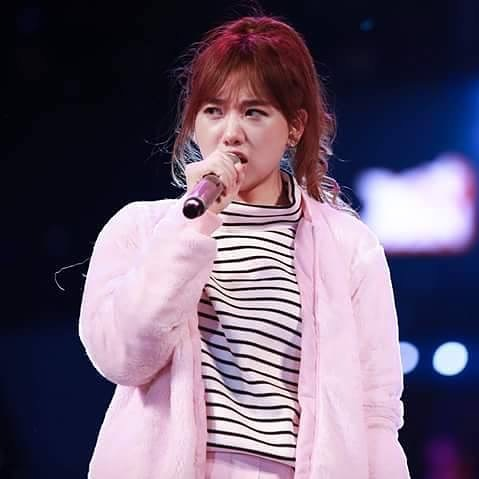

In [326]:
# show image
image = cv2.imread(test_images[1])
cv2_imshow(image)

In [327]:
# Turn prediction probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
  """
  Turns an array of prediction probabilities into a label.
  """
  return unique_test_labels[np.argmax(prediction_probabilities)]


In [328]:
get_pred_label(Y_test_pred_proba[0])


'sam.ng_official'

In [329]:
test_labels = test_df['labels'].tolist()

In [330]:

def plot_pred(prediction_probabilities, labels, images, n=0):
  """
  View the prediction, ground truth and image for sample n
  """
  import matplotlib.pyplot as plt
  from skimage import io
  # from pylab import rcParams
  # rcParams['figure.figsize'] = 5, 10
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], io.imread(images[n])
  
  # Get the pred label
  pred_label = get_pred_label(pred_prob)
  # Plot image & remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # Change the colour of the title depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"
  
  # Change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label,
                                    np.max(pred_prob)*100,
                                    true_label),
                                    color=color)

In [331]:
len(test_images)

2278

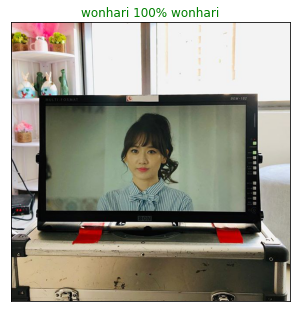

In [332]:
plot_pred(Y_test_pred_proba,test_labels,test_images,10)

In [333]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  Plus the top 10 highest prediction confidences along with the truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # Get the predicted label
  pred_label = get_pred_label(pred_prob)

  # Find the top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # Find the top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # Find the top 10 prediction labels
  top_10_pred_labels = unique_test_labels[top_10_pred_indexes]

  # Setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color="grey")
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels=top_10_pred_labels,
             rotation="vertical")
  
  # Change color of true label
  if np.isin(true_label, top_10_pred_labels):
    top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

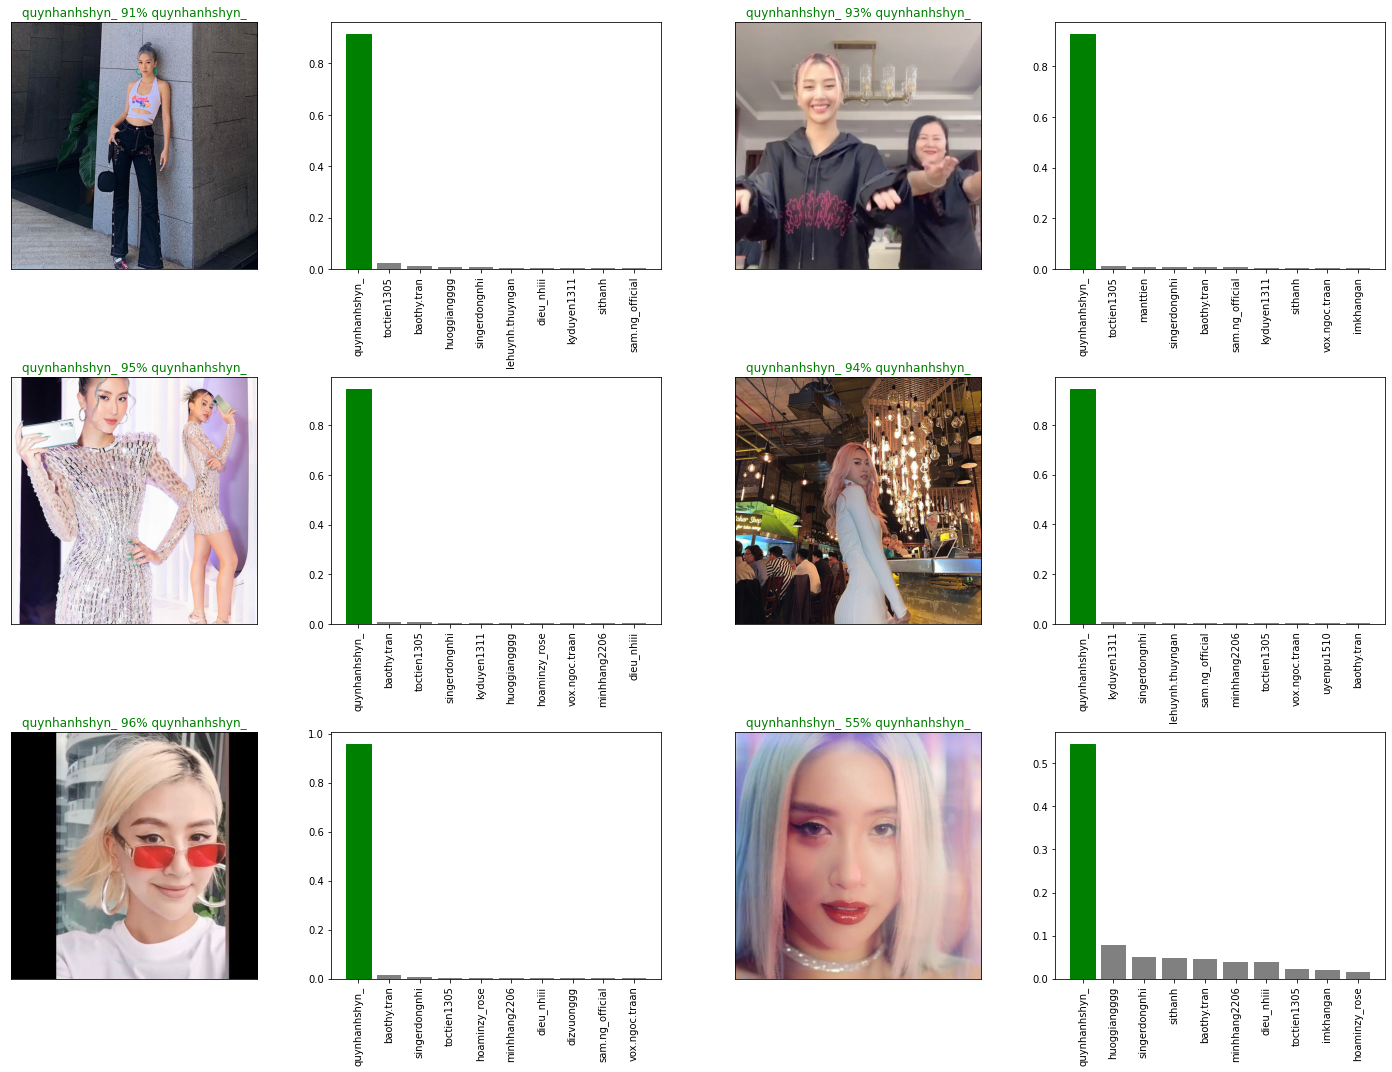

In [334]:
# Let's check out a few predictions and their different values
i_multiplier = randint(0,len(test_df))
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(10*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=Y_test_pred_proba,
            labels=test_labels,
            images=test_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=Y_test_pred_proba,
                 labels=test_labels,
                 n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()